In [1]:
%pylab inline
import numpy as np
import csv
from scipy import linalg
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def least_squares(A, b):
    return np.linalg.inv(A.T.dot(A)).dot(A.T).dot(b)

In [3]:
#generate data
center = np.array([2,3])
x_dia = 2;
y_dia = 3;

number_of_points = 20;
init_points = np.repeat(center, number_of_points).reshape([2,number_of_points])
theta = np.linspace(-3*pi/4,3*pi/4,number_of_points)
points = np.zeros([2,number_of_points])
points[0,:] = init_points[0,:] + x_dia*cos(theta)
points[1,:] = init_points[1,:] + x_dia*sin(theta)

rotation_matrix = np.array([[cos(pi/6), -sin(pi/6)] , [sin(pi/6), cos(pi/6)]])
rot_points = np.dot(rotation_matrix, points)

planet_data = rot_points.T + np.random.normal(0,0.1,[2,number_of_points]).T

In [4]:
planet_data ## x,y pairs for the planet data

array([[-0.54533825,  1.66849219],
       [ 0.18806894,  1.7990436 ],
       [ 0.72193683,  1.61203809],
       [ 1.0735119 ,  1.89424186],
       [ 1.52948828,  1.87354168],
       [ 1.84269271,  2.44513058],
       [ 2.15541283,  2.62887809],
       [ 2.19855867,  3.52081662],
       [ 1.96577765,  4.03836785],
       [ 2.15778201,  4.23705187],
       [ 1.886722  ,  4.81868465],
       [ 1.45351972,  5.14394269],
       [ 1.11808982,  5.40035652],
       [ 0.69395806,  5.46611961],
       [ 0.1179742 ,  5.65546972],
       [-0.49544434,  5.52031048],
       [-0.76702431,  5.36973344],
       [-1.12365657,  4.85992517],
       [-1.60842052,  4.64998044],
       [-1.71147179,  4.10081319]])

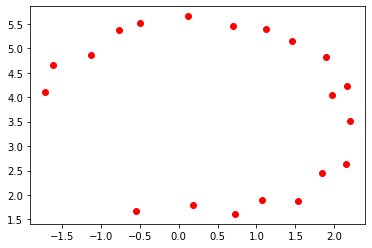

In [5]:
plt.plot(planet_data[:,0], planet_data[:,1], 'ro')

In [6]:
A = (np.vstack((planet_data[:,0]**2, planet_data[:,0]*planet_data[:,1], planet_data[:,1]**2, planet_data[:,0], planet_data[:,1]))).T

In [7]:
b = np.ones([number_of_points,1])

In [8]:
xhat = least_squares(A, b)

In [9]:
a_1 = xhat[0]
b_1 = xhat[1]
c_1 = xhat[2]
d_1 = xhat[3]
e_1 = xhat[4]

In [10]:
np.dot(A,xhat)

array([[0.92570776],
       [1.05530406],
       [0.96680049],
       [1.03713957],
       [0.93985575],
       [1.02267493],
       [0.95410268],
       [1.02440958],
       [1.08477325],
       [0.9877977 ],
       [0.96561408],
       [0.99785368],
       [0.98135161],
       [1.01985243],
       [0.97106007],
       [0.98475846],
       [0.9984218 ],
       [1.07349799],
       [0.96777326],
       [1.00653767]])

<ipython-input-11-7a6f1c33254d>:4: RuntimeWarning: invalid value encountered in sqrt
  y_range_1 = (-(e_1 + b_1*x_range) + np.sqrt((b_1**2 - 4*a_1*c_1)*x_range**2 + (2*e_1*b_1 - 4*c_1*d_1)*x_range + (e_1**2 + 4*c_1)))/(2*c_1)
<ipython-input-11-7a6f1c33254d>:5: RuntimeWarning: invalid value encountered in sqrt
  y_range_2 = (-(e_1 + b_1*x_range) - np.sqrt((b_1**2 - 4*a_1*c_1)*x_range**2 + (2*e_1*b_1 - 4*c_1*d_1)*x_range + (e_1**2 + 4*c_1)))/(2*c_1)


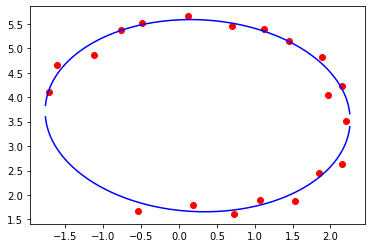

In [11]:
#plotting hacks
no_points_curve = 1000
x_range = linspace(-2.5, 2.5, no_points_curve)
y_range_1 = (-(e_1 + b_1*x_range) + np.sqrt((b_1**2 - 4*a_1*c_1)*x_range**2 + (2*e_1*b_1 - 4*c_1*d_1)*x_range + (e_1**2 + 4*c_1)))/(2*c_1)
y_range_2 = (-(e_1 + b_1*x_range) - np.sqrt((b_1**2 - 4*a_1*c_1)*x_range**2 + (2*e_1*b_1 - 4*c_1*d_1)*x_range + (e_1**2 + 4*c_1)))/(2*c_1)
x_range_no_nan = x_range[~isnan(y_range_1)]
y_range_1_no_nan = y_range_1[~isnan(y_range_1)]
y_range_2_no_nan = y_range_2[~isnan(y_range_1)]

plt.plot(planet_data[:,0], planet_data[:,1], 'ro')
plt.plot(x_range_no_nan, y_range_1_no_nan, 'b')
plt.plot(x_range_no_nan, y_range_2_no_nan, 'b')
plt.show()

In [12]:
A

array([[ 2.97393805e-01, -9.09892610e-01,  2.78386620e+00,
        -5.45338248e-01,  1.66849219e+00],
       [ 3.53699272e-02,  3.38344227e-01,  3.23655786e+00,
         1.88068943e-01,  1.79904360e+00],
       [ 5.21192791e-01,  1.16378967e+00,  2.59866679e+00,
         7.21936833e-01,  1.61203809e+00],
       [ 1.15242779e+00,  2.03349116e+00,  3.58815221e+00,
         1.07351190e+00,  1.89424186e+00],
       [ 2.33933438e+00,  2.86556003e+00,  3.51015843e+00,
         1.52948828e+00,  1.87354168e+00],
       [ 3.39551642e+00,  4.50562430e+00,  5.97866355e+00,
         1.84269271e+00,  2.44513058e+00],
       [ 4.64580446e+00,  5.66631757e+00,  6.91100004e+00,
         2.15541283e+00,  2.62887809e+00],
       [ 4.83366023e+00,  7.74072191e+00,  1.23961497e+01,
         2.19855867e+00,  3.52081662e+00],
       [ 3.86428179e+00,  7.93853328e+00,  1.63084149e+01,
         1.96577765e+00,  4.03836785e+00],
       [ 4.65602319e+00,  9.14263428e+00,  1.79526085e+01,
         2.15778201e+00

In [13]:
A

array([[ 2.97393805e-01, -9.09892610e-01,  2.78386620e+00,
        -5.45338248e-01,  1.66849219e+00],
       [ 3.53699272e-02,  3.38344227e-01,  3.23655786e+00,
         1.88068943e-01,  1.79904360e+00],
       [ 5.21192791e-01,  1.16378967e+00,  2.59866679e+00,
         7.21936833e-01,  1.61203809e+00],
       [ 1.15242779e+00,  2.03349116e+00,  3.58815221e+00,
         1.07351190e+00,  1.89424186e+00],
       [ 2.33933438e+00,  2.86556003e+00,  3.51015843e+00,
         1.52948828e+00,  1.87354168e+00],
       [ 3.39551642e+00,  4.50562430e+00,  5.97866355e+00,
         1.84269271e+00,  2.44513058e+00],
       [ 4.64580446e+00,  5.66631757e+00,  6.91100004e+00,
         2.15541283e+00,  2.62887809e+00],
       [ 4.83366023e+00,  7.74072191e+00,  1.23961497e+01,
         2.19855867e+00,  3.52081662e+00],
       [ 3.86428179e+00,  7.93853328e+00,  1.63084149e+01,
         1.96577765e+00,  4.03836785e+00],
       [ 4.65602319e+00,  9.14263428e+00,  1.79526085e+01,
         2.15778201e+00